In [142]:
import csv, sqlite3
import pandas as pd

In [143]:
conn = sqlite3.connect("Employees.db")
cur = conn.cursor()

In [144]:
%load_ext sql 
%sql sqlite:///Employees.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [145]:
%%sql

-- Create the Employees table
CREATE TABLE Employees (
    EmployeeID INT PRIMARY KEY,
    FirstName VARCHAR(50),
    LastName VARCHAR(50),
    Email VARCHAR(100),
    Department VARCHAR(50),
    HireDate DATE,
    Salary DECIMAL(10, 2)
);

-- Insert 12 tuples into the Employees table
INSERT INTO Employees (EmployeeID, FirstName, LastName, Email, Department, HireDate, Salary)
VALUES
    (1, 'John', 'Doe', 'john.doe@example.com', 'HR', '2020-01-15', 55000.00),
    (2, 'Jane', 'Smith', 'jane.smith@example.com', 'IT', '2019-03-20', 60000.00),
    (3, 'Michael', 'Johnson', 'michael.johnson@example.com', 'Finance', '2021-05-10', 65000.00),
    (4, 'Emily', 'Brown', 'emily.brown@example.com', 'Marketing', '2018-08-02', 58000.00),
    (5, 'David', 'Wilson', 'david.wilson@example.com', 'IT', '2017-11-30', 62000.00),
    (6, 'Sarah', 'Davis', 'sarah.davis@example.com', 'Finance', '2022-02-14', 70000.00),
    (7, 'James', 'Lee', 'james.lee@example.com', 'HR', '2019-09-25', 56000.00),
    (8, 'Linda', 'Martinez', 'linda.martinez@example.com', 'Marketing', '2016-07-12', 59000.00),
    (9, 'Christopher', 'Garcia', 'christopher.garcia@example.com', 'IT', '2020-04-05', 63000.00),
    (10, 'Amanda', 'Hernandez', 'amanda.hernandez@example.com', 'Finance', '2021-10-18', 68000.00),
    (11, 'Daniel', 'Anderson', 'daniel.anderson@example.com', 'HR', '2018-12-08', 57000.00),
    (12, 'Susan', 'Taylor', 'susan.taylor@example.com', 'Marketing', '2017-02-22', 60000.00);

 * sqlite:///Employees.db
(sqlite3.OperationalError) table Employees already exists
[SQL: -- Create the Employees table
CREATE TABLE Employees (
    EmployeeID INT PRIMARY KEY,
    FirstName VARCHAR(50),
    LastName VARCHAR(50),
    Email VARCHAR(100),
    Department VARCHAR(50),
    HireDate DATE,
    Salary DECIMAL(10, 2)
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [146]:
%sql SELECT * FROM Employees;

 * sqlite:///Employees.db
Done.


EmployeeID,FirstName,LastName,Email,Department,HireDate,Salary
1,John,Doe,john.doe@example.com,HR,2020-01-15,55000
2,Jane,Smith,jane.smith@example.com,IT,2019-03-20,60000
3,Michael,Johnson,michael.johnson@example.com,Finance,2021-05-10,65000
4,Emily,Brown,emily.brown@example.com,Marketing,2018-08-02,58000
5,David,Wilson,david.wilson@example.com,IT,2017-11-30,62000
6,Sarah,Davis,sarah.davis@example.com,Finance,2022-02-14,70000
7,James,Lee,james.lee@example.com,HR,2019-09-25,56000
8,Linda,Martinez,linda.martinez@example.com,Marketing,2016-07-12,59000
9,Christopher,Garcia,christopher.garcia@example.com,IT,2020-04-05,63000
10,Amanda,Hernandez,amanda.hernandez@example.com,Finance,2021-10-18,68000


In [147]:
dep = "HR"
%sql SELECT * FROM Employees WHERE Department = :dep;

 * sqlite:///Employees.db
Done.


EmployeeID,FirstName,LastName,Email,Department,HireDate,Salary
1,John,Doe,john.doe@example.com,HR,2020-01-15,55000
7,James,Lee,james.lee@example.com,HR,2019-09-25,56000
11,Daniel,Anderson,daniel.anderson@example.com,HR,2018-12-08,57000


In [148]:
%sql SELECT DISTINCT Department FROM Employees;

 * sqlite:///Employees.db
Done.


Department
HR
IT
Finance
Marketing


In [149]:
# -- emp_sal  = %sql ALTER TABLE Employees ADD emp_name varchar(255) UPDATE Employees SET emp_name = CONCAT(FirstName, ' ', LastName);
emp_sal = %sql SELECT FirstName,LastName, Salary FROM Employees;

 * sqlite:///Employees.db
Done.


In [150]:
emp_sal

FirstName,LastName,Salary
John,Doe,55000
Jane,Smith,60000
Michael,Johnson,65000
Emily,Brown,58000
David,Wilson,62000
Sarah,Davis,70000
James,Lee,56000
Linda,Martinez,59000
Christopher,Garcia,63000
Amanda,Hernandez,68000


In [151]:
emp_sal = emp_sal.DataFrame()

In [152]:
emp_sal['FirstName'] = emp_sal['FirstName'] +" "+ emp_sal['LastName']
emp_sal = emp_sal.rename(columns={'FirstName':"Name"})
emp_sal = emp_sal.drop(['LastName'], axis=1)
emp_sal

,Name,Salary
0,John Doe,55000
1,Jane Smith,60000
2,Michael Johnson,65000
3,Emily Brown,58000
4,David Wilson,62000
5,Sarah Davis,70000
6,James Lee,56000
7,Linda Martinez,59000
8,Christopher Garcia,63000
9,Amanda Hernandez,68000


In [153]:
# emp_sal["FirstName"] = emp_sal[["FirstName", "LastName"]].apply(" ".join, axis=1)
# emp_sal

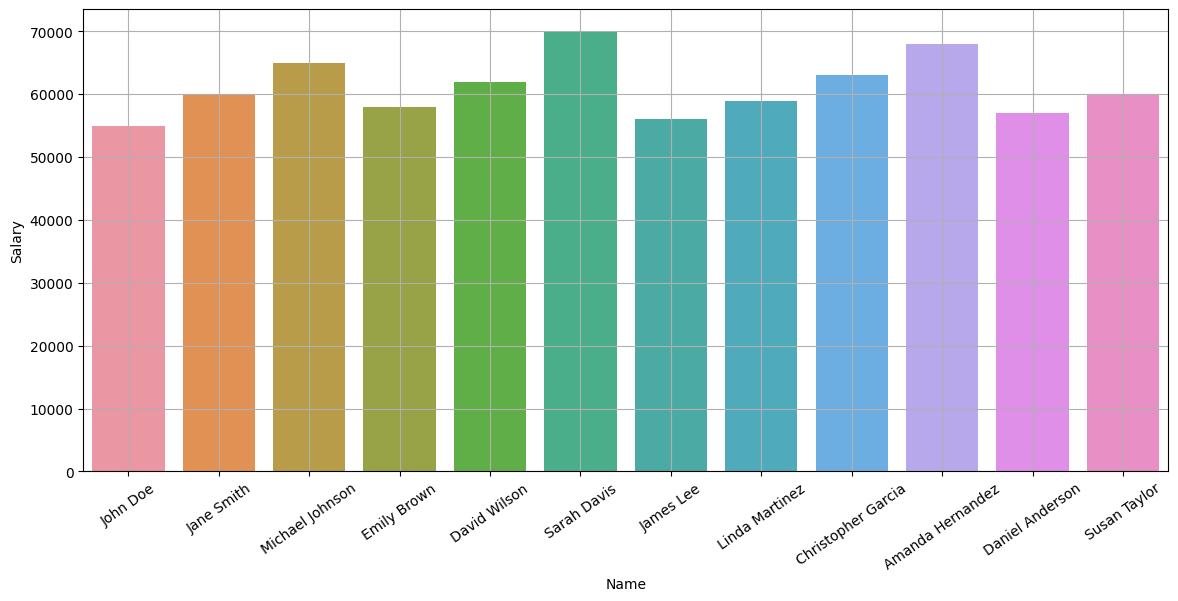

In [154]:
import matplotlib.pyplot as plt
plt.style.use("default")
plt.figure(figsize=(14, 6))
import seaborn as sb

sb.barplot(x = "Name", y = "Salary", data=emp_sal)
plt.xticks(rotation = 35)
plt.grid()

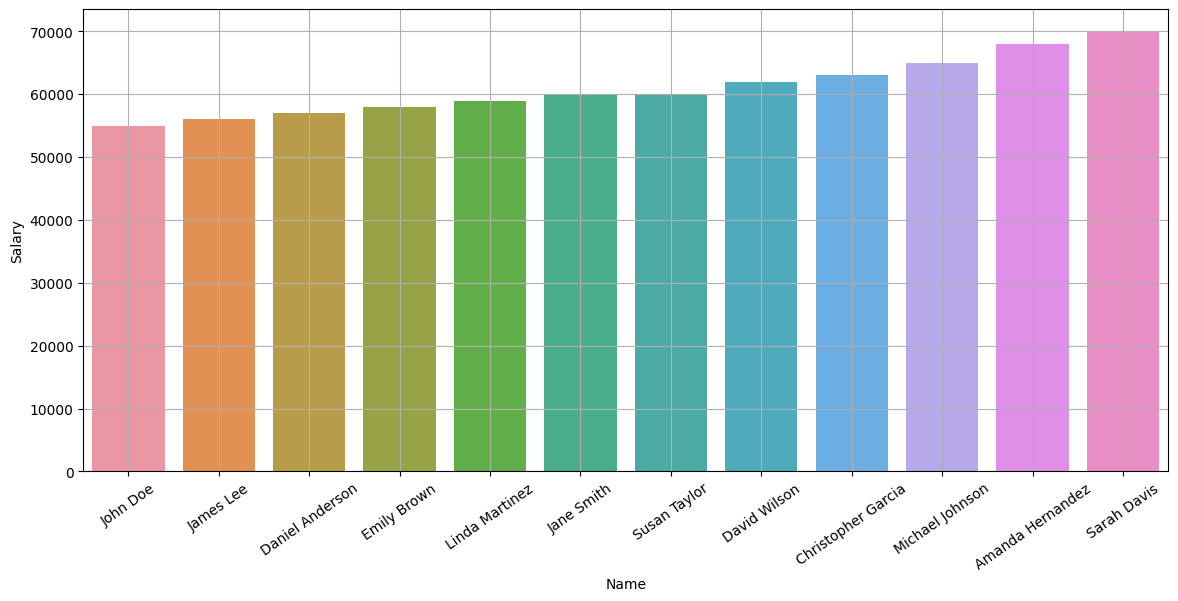

In [155]:
plt.figure(figsize=(14, 6))
emp_sal = emp_sal.sort_values(by="Salary", ascending=True)
sb.barplot(x = "Name", y = "Salary", data=emp_sal)
plt.xticks(rotation = 35)
plt.grid()

In [156]:
%%sql

SELECT * FROM Employees;

 * sqlite:///Employees.db
Done.


EmployeeID,FirstName,LastName,Email,Department,HireDate,Salary
1,John,Doe,john.doe@example.com,HR,2020-01-15,55000
2,Jane,Smith,jane.smith@example.com,IT,2019-03-20,60000
3,Michael,Johnson,michael.johnson@example.com,Finance,2021-05-10,65000
4,Emily,Brown,emily.brown@example.com,Marketing,2018-08-02,58000
5,David,Wilson,david.wilson@example.com,IT,2017-11-30,62000
6,Sarah,Davis,sarah.davis@example.com,Finance,2022-02-14,70000
7,James,Lee,james.lee@example.com,HR,2019-09-25,56000
8,Linda,Martinez,linda.martinez@example.com,Marketing,2016-07-12,59000
9,Christopher,Garcia,christopher.garcia@example.com,IT,2020-04-05,63000
10,Amanda,Hernandez,amanda.hernandez@example.com,Finance,2021-10-18,68000


In [157]:
## Converting the whole data into the dataframe

mydata = pd.read_sql_query("SELECT * FROM Employees", conn)
mydata

,EmployeeID,FirstName,LastName,Email,Department,HireDate,Salary
0,1,John,Doe,john.doe@example.com,HR,2020-01-15,55000
1,2,Jane,Smith,jane.smith@example.com,IT,2019-03-20,60000
2,3,Michael,Johnson,michael.johnson@example.com,Finance,2021-05-10,65000
3,4,Emily,Brown,emily.brown@example.com,Marketing,2018-08-02,58000
4,5,David,Wilson,david.wilson@example.com,IT,2017-11-30,62000
5,6,Sarah,Davis,sarah.davis@example.com,Finance,2022-02-14,70000
6,7,James,Lee,james.lee@example.com,HR,2019-09-25,56000
7,8,Linda,Martinez,linda.martinez@example.com,Marketing,2016-07-12,59000
8,9,Christopher,Garcia,christopher.garcia@example.com,IT,2020-04-05,63000
9,10,Amanda,Hernandez,amanda.hernandez@example.com,Finance,2021-10-18,68000


In [158]:
conn.close()